<a href="https://colab.research.google.com/github/niknik01-del/niknik01-del/blob/main/latihan_LDA_in_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# LDA Bahasa Indonesia

Instalasi beberapa library yang diperlukan, untuk NLTK dan GENSIM sudah include di Colab

In [ ]:
pip install --upgrade gensim

In [ ]:
pip install pyldavis==3.2.1

  Using cached pyLDAvis-3.2.1-py2.py3-none-any.whl
  Attempting uninstall: pyldavis
    Found existing installation: pyLDAvis 3.4.1
    Uninstalling pyLDAvis-3.4.1:
      Successfully uninstalled pyLDAvis-3.4.1


In [ ]:
!pip install --upgrade pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.5 MB/s eta 0:00:00


In [ ]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.4 MB/s eta 0:00:00


In [ ]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 14.6 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=38cfcadc2baa2ed42c30e8c9862fd759f85a62527ab7550a035fe1cf5b410a98
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


# Preparing Data

In [ ]:
import pandas as pd
import numpy as np
import nltk

In [ ]:
#import data dari GDrive
#bisa lihat di video ini https://youtu.be/AAwgqf2d82k
! gdown --id 1JXKfpv2rAPVn9OcPQAVh3YCXGn7XnACR #id file di drive, bisa dilihat di link file dengan menu share file

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JXKfpv2rAPVn9OcPQAVh3YCXGn7XnACR
To: /content/dataBerita.xlsx
100% 26.9k/26.9k [00:00<00:00, 29.7MB/s]


In [ ]:
import pandas as pd
import numpy as np
import nltk

In [ ]:
!pip install gdown

In [ ]:
#import data dari Gdrive
! gdown--id 1LSUFjTX8gRN1x1PwBmIPeJ

/bin/bash: line 1: gdown--id: command not found


In [ ]:
!rm -rf ~/.cache/gdown  # Delete gdown cache directory

In [ ]:
#import file xlsx untuk proses normalisasi
!gdown --id 1LSUFjTX8gRN1x1PwBmIPeJ #id file di drive

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1LSUFjTX8gRN1x1PwBmIPeJ

but Gdown can't. Please check connections and permissions.


In [ ]:
# Instead of using pd.read_csv(), use pd.read_excel() if your data is in an Excel file:
#dataSB = pd.read_excel('/content/drive/MyDrive/LDA_Tpoic_Modelling/youtube-comments_palestine israel war_LDA.xlsx', sheet_name="Sheet1") #lokasi file


#If your file is actually a CSV file, remove the 'sheet_name' argument:
dataSB = pd.read_csv('/content/drive/MyDrive/LDA_Tpoic_Modelling/youtube-comments_naturalisasi_Timnas_2000.csv') #lokasi file

In [ ]:
print(dataSB.head())

            publishedAt     authorDisplayName  \
0  2024-11-25T06:40:42Z        @RAIHANAHSHORT   
1  2024-11-24T14:28:49Z         @TrueLine-x2p   
2  2024-11-24T14:27:13Z  @yohanessetiawan2170   
3  2024-11-24T13:38:07Z          @Broomen-f3e   
4  2024-11-24T13:25:53Z      @RizqAkhmadFauzi   

                                textDisplay  likeCount  
0                     NAMAY RAFAEL NGUYEN 😅          0  
1  Baru satu Wkwkw <br>Easy buat bang jay😂😅          0  
2              Nguyen sound System horeg...          0  
3     Wajib hati-hati nih udh setara neymar          0  
4                               Ga ngaruh 😂          0  


In [ ]:
# Check the actual column names in your DataFrame
print(dataSB.columns)

# If 'textDisplay' is not in the columns, and 'textdata' is, use 'textdata':
if 'textDisplay' not in dataSB.columns and 'textdata' in dataSB.columns:
    text_column_name = 'textdata'
# Otherwise, if 'textDisplay' is in the columns, use it:
elif 'textDisplay' in dataSB.columns:
    text_column_name = 'textDisplay'
# If neither column exists, raise an error or handle it appropriately
else:
    raise KeyError("Neither 'textDisplay' nor 'textdata' column found in the DataFrame.")

# Now use the correct column name for case folding and renaming
dataSB[text_column_name] = dataSB[text_column_name].str.lower()
dataSB = dataSB.rename(columns={text_column_name: 'textdata'})

Index(['publishedAt', 'authorDisplayName', 'textDisplay', 'likeCount'], dtype='object')


In [ ]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas

dataSB['textdata'] = dataSB['textdata'].str.lower()

print('Case Folding Result : \n')
print(dataSB['textdata'].head(5))

Case Folding Result : 

0                       namay rafael nguyen 😅
1    baru satu wkwkw <br>easy buat bang jay😂😅
2                nguyen sound system horeg...
3       wajib hati-hati nih udh setara neymar
4                                 ga ngaruh 😂
Name: textdata, dtype: object


# Tokenizing

Menghapus karakter-karakter yang tidak penting dari text

In [ ]:
import string
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
# ------ Tokenizing ---------
import nltk

nltk.download('punkt')
nltk.download('punkt_tab') # Added this line to download 'punkt_tab' data

def remove_tweet_special(text):
    # Check if the input is a string
    if isinstance(text, str):
        # remove tab, new line, ans back slice
        text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
        # remove non ASCII (emoticon, chinese word, .etc)
        text = text.encode('ascii', 'replace').decode('ascii')
        # remove mention, link, hashtag
        text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
        # remove incomplete URL
        return text.replace("http://", " ").replace("https://", " ")
    else:
        # If not a string, return an empty string to avoid errors
        return ''

dataSB['textdata'] = dataSB['textdata'].apply(remove_tweet_special)

# ... (rest of your code)
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

dataSB['textdata'] = dataSB['textdata'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

dataSB['textdata'] = dataSB['textdata'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

dataSB['textdata'] = dataSB['textdata'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

dataSB['textdata'] = dataSB['textdata'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dataSB['textdata'] = dataSB['textdata'].apply(remove_singl_char)

# NLTK word tokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

dataSB['textdata_tokens'] = dataSB['textdata'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n')
print(dataSB['textdata_tokens'].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Tokenizing Result : 

0                         [namay, rafael, nguyen]
1    [baru, satu, wkwkw, breasy, buat, bang, jay]
2                  [nguyen, sound, system, horeg]
3     [wajib, hatihati, nih, udh, setara, neymar]
4                                    [ga, ngaruh]
Name: textdata_tokens, dtype: object


In [ ]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

dataSB['textdata_tokens_fdist'] = dataSB['textdata_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n')
print(dataSB['textdata_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0               [(namay, 1), (rafael, 1), (nguyen, 1)]
1    [(baru, 1), (satu, 1), (wkwkw, 1), (breasy, 1)...
2    [(nguyen, 1), (sound, 1), (system, 1), (horeg,...
3    [(wajib, 1), (hatihati, 1), (nih, 1), (udh, 1)...
4                               [(ga, 1), (ngaruh, 1)]
Name: textdata_tokens_fdist, dtype: object


# Stopwords
Membersihkan teks dari kata-kata yang termasuk ke dalam stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'bisnis','udh','wkwkw',
                       'bang'])

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dataSB['textdata_tokens_WSW'] = dataSB['textdata_tokens'].apply(stopwords_removal)

print(dataSB['textdata_tokens_WSW'].head())

0              [namay, rafael, nguyen]
1                        [breasy, jay]
2       [nguyen, sound, system, horeg]
3    [wajib, hatihati, setara, neymar]
4                             [ngaruh]
Name: textdata_tokens_WSW, dtype: object


# Normalisasi
Mengganti kata-kata tertentu dengan kata lain yang lebih tepat

In [ ]:
#import file xlsx untuk proses normalisasi
! gdown --id 1LSUFjTX8gRN1x1PwBmIPeJ #id file di drive

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1LSUFjTX8gRN1x1PwBmIPeJ

but Gdown can't. Please check connections and permissions.


In [ ]:
!wget -O normalisasi.xlsx "https://drive.google.com/uc?id=1LSUFjTX8gRN1x1PwBmIPeJ"

--2024-12-04 12:43:30--  https://drive.google.com/uc?id=1LSUFjTX8gRN1x1PwBmIPeJ
Resolving drive.google.com (drive.google.com)... 142.251.2.113, 142.251.2.138, 142.251.2.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1LSUFjTX8gRN1x1PwBmIPeJ [following]
--2024-12-04 12:43:30--  https://drive.usercontent.google.com/download?id=1LSUFjTX8gRN1x1PwBmIPeJ
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-12-04 12:43:30 ERROR 404: Not Found.



In [ ]:
normalizad_word = pd.read_excel('/content/drive/MyDrive/LDA_Tpoic_Modelling/normalisasi.xlsx') #lokasi file

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

dataSB['textdata_normalized'] = dataSB['textdata_tokens_WSW'].apply(normalized_term)

dataSB['textdata_normalized'].head(10)

<ipython-input-17-de14f503ff4a>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
<ipython-input-17-de14f503ff4a>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


,textdata_normalized
0,"[namay, rafael, nguyen]"
1,"[breasy, jay]"
2,"[nguyen, sound, system, horeg]"
3,"[wajib, hatihati, setara, neymar]"
4,[ngaruh]
5,"[kocak, vietnam, pemain, gabung, rela, ganti, ..."
6,"[vietnam, indonesia, menaturalisasi, pemain, b..."
7,"[nguyen, orang]"
8,"[ngapain, aff, doang, bjir, aff, akui, fifa]"
9,"[bagussemoga, mengalahkan, indonesiawkwkwk]"


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in dataSB['textdata_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))


4381


Agak lama

In [ ]:
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)

    # untuk melihat hasilnya silahkan jalankan baris di bawah ini
    # print(term,":" ,term_dict[term])

In [ ]:
# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

dataSB['textdata_tokens_stemmed'] = dataSB['textdata_normalized'].swifter.apply(get_stemmed_term)

print(dataSB['textdata_tokens_stemmed'])

Pandas Apply:   0%|          | 0/2081 [00:00<?, ?it/s]

0                                 [namay, rafael, nguyen]
1                                           [breasy, jay]
2                          [nguyen, sound, system, horeg]
3                         [wajib, hatihati, tara, neymar]
4                                                [ngaruh]
                              ...                        
2076                   [smg, sukses, nak, gabung, timnas]
2077                                               [umur]
2078                        [suara, bagus, nyanyi, fasih]
2079    [nyanyi, rusak, mental, atlet, suport, sepak, ...
2080    [bwaduh, suruh, yanyibbrbkira, audisi, nyanyi,...
Name: textdata_tokens_stemmed, Length: 2081, dtype: object


In [ ]:
#stopwords #2

from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(['ole','krn','org','ki','sdh','mu','kirain',
                       'da','udah','aja','tp','bgt','ma','jd','utk',
                       'gk','gak','dgn','bro','tau','klo','bh','sih',
                       'nak','nih','nya','ayo','ya','kalo','ga','mah',
                       'bh','ni','ma','jgn','d','si','dr','tdk','biar',
                       'yg','semoga','banget','bwaduh'])

# convert list to dictionary
list_stopwords = set(list_stopwords)

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dataSB['textdata_tokens_stemmed2'] = dataSB['textdata_tokens_stemmed'].apply(stopwords_removal)

print(dataSB['textdata_tokens_stemmed2'].head())

0            [namay, rafael, nguyen]
1                      [breasy, jay]
2     [nguyen, sound, system, horeg]
3    [wajib, hatihati, tara, neymar]
4                           [ngaruh]
Name: textdata_tokens_stemmed2, dtype: object


In [ ]:
for i in range(len(dataSB)):
        a=dataSB.iloc[i][6]
        document.append(a)

document[0:5]

['bwaduh', 'suruh', 'yanyibbrbkira', 'audisi', 'nyanyi']

In [ ]:
doc_clean = dataSB['textdata_tokens_stemmed2']
doc_clean

,textdata_tokens_stemmed2
0,"[namay, rafael, nguyen]"
1,"[breasy, jay]"
2,"[nguyen, sound, system, horeg]"
3,"[wajib, hatihati, tara, neymar]"
4,[ngaruh]
...,...
2076,"[smg, sukses, gabung, timnas]"
2077,[umur]
2078,"[suara, bagus, nyanyi, fasih]"
2079,"[nyanyi, rusak, mental, atlet, suport, sepak, ..."


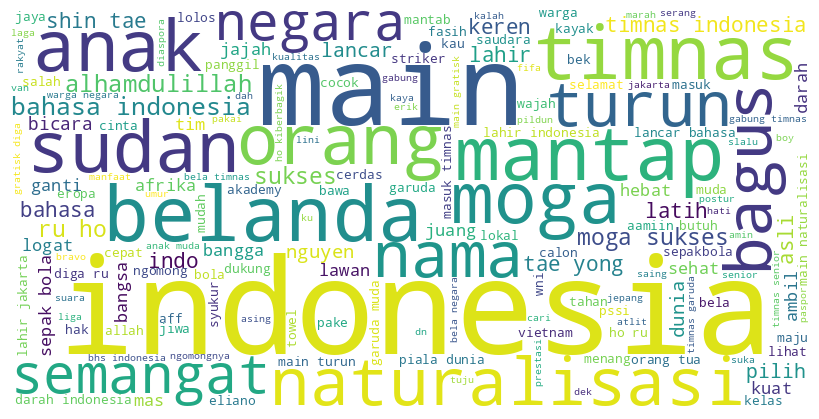

Word cloud telah disimpan di Google Drive Anda.


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

# Gabungkan semua token yang telah dibersihkan menjadi satu string teks
all_words = ' '.join([' '.join(tokens) for tokens in dataSB['textdata_tokens_stemmed2']])

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(all_words)

# Tampilkan word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Simpan word cloud dalam format JPG
wordcloud.to_file('/content/drive/My Drive/wordcloud.jpg')

# Simpan word cloud dalam format PNG
wordcloud.to_file('/content/drive/My Drive/wordcloud.png')

print("Word cloud telah disimpan di Google Drive Anda.")

# LDA model using gensim
Proses topic modeling dengan LDA gensim

In [ ]:
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

Dictionary<3723 unique tokens: ['namay', 'nguyen', 'rafael', 'breasy', 'jay']...>


In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

total_topics = 10 # jumlah topik yang akan di extract
number_words = 10 # jumlah kata per topik

In [ ]:
# Running and Trainign LDA model on the document term matrix.
lda_model = Lda(doc_term_matrix, num_topics=total_topics, id2word = dictionary, passes=50)

lda_model.show_topics(num_topics=total_topics, num_words=number_words)

[(0,
  '0.044*"alhamdulillah" + 0.037*"sudan" + 0.034*"indonesia" + 0.028*"allah" + 0.027*"timnas" + 0.024*"asli" + 0.023*"bela" + 0.020*"anak" + 0.020*"moga" + 0.020*"lahir"'),
 (1,
  '0.057*"mantap" + 0.028*"top" + 0.027*"masuk" + 0.025*"kn" + 0.019*"aff" + 0.018*"indonesia" + 0.016*"klub" + 0.016*"pas" + 0.014*"enak" + 0.014*"bahasa"'),
 (2,
  '0.062*"moga" + 0.047*"sukses" + 0.034*"jakarta" + 0.032*"towel" + 0.029*"orang" + 0.024*"suka" + 0.022*"aamiin" + 0.022*"sehat" + 0.018*"lahir" + 0.018*"anak"'),
 (3,
  '0.031*"latih" + 0.027*"semangat" + 0.026*"agama" + 0.025*"kak" + 0.022*"pssi" + 0.021*"naturalisasi" + 0.019*"umur" + 0.018*"dubbing" + 0.017*"boy" + 0.017*"asli"'),
 (4,
  '0.059*"indonesia" + 0.046*"timnas" + 0.028*"garuda" + 0.024*"tata" + 0.023*"lancar" + 0.023*"sukses" + 0.022*"mantap" + 0.019*"dunia" + 0.019*"negara" + 0.019*"calon"'),
 (5,
  '0.064*"bagus" + 0.036*"bahasa" + 0.033*"suara" + 0.029*"hamzah" + 0.023*"fasih" + 0.019*"moga" + 0.018*"tangguh" + 0.018*"timnas

In [ ]:
# Word Count of Topic Keywords

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount_naturalisasi = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
print(df_imp_wcount_naturalisasi)

             word  topic_id  importance  word_count
0   alhamdulillah         0    0.043960          70
1           sudan         0    0.036743         107
2       indonesia         0    0.033992         640
3           allah         0    0.027780          31
4          timnas         0    0.027217         224
..            ...       ...         ...         ...
95          orang         9    0.022734         116
96          turun         9    0.021963          97
97            tua         9    0.020893          29
98      sepakbola         9    0.019118          17
99         nyanyi         9    0.016651           4

[100 rows x 4 columns]


In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
#simpan ke google drive
df_imp_wcount.to_csv('df_imp_wcount_naturalisasi.csv')
!cp df_imp_wcount_naturalisasi.csv "/content/drive/MyDrive/LDA_Tpoic_Modelling/LDA Naturalisasi/"

cp: cannot create regular file '/content/drive/MyDrive/LDA_Tpoic_Modelling/LDA Naturalisasi/': Not a directory


In [ ]:
# ... your code ...

#simpan ke google drive
df_imp_wcount_naturalisasi.to_csv('df_imp_wcount.csv')

# Create the target directory
!mkdir -p "drive/My Drive/LDA_Tpoic_Modelling/LDA Naturalisas"

# Copy the file to the target directory with the file name
!cp df_imp_wcount_naturalisasi.csv "drive/My Drive/LDA_Tpoic_Modelling/LDA Naturalisas/df_imp_wcount.csv"

# ... rest of your code ...

In [ ]:
#jika simpan ke local drive
#filedisimpan='df_imp_wcount.xlsx'
#df_imp_wcount.to_excel(filedisimpan, index = False, header=True)

In [ ]:
# Dominan topic and its percentage contribution in each topic
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts=document):
    # Init output
    sent_topics_df = []  # Initialize as a list to store rows

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                # Append a new row as a dictionary to the list
                sent_topics_df.append({
                    'Dominant_Topic': int(topic_num),
                    'Perc_Contribution': round(prop_topic, 4),
                    'Topic_Keywords': topic_keywords
                })
            else:
                break

    # Create DataFrame after the loop
    sent_topics_df = pd.DataFrame(sent_topics_df)

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)

    return(sent_topics_df)

# Call the function and assign the result to df_dominant_topic
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=doc_clean)
df_dominant_topic_naturalisasi = df_topic_sents_keywords.reset_index()
df_dominant_topic_naturalisasi.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Now you can save it to a CSV file
df_dominant_topic_naturalisasi.to_csv('df_dominant_topic.csv')
!cp df_dominant_topic_naturalisasi.csv "/content/drive/MyDrive/LDA_Tpoic_Modelling/LDA Naturalisas/"

cp: cannot stat 'df_dominant_topic_naturalisasi.csv': No such file or directory


In [ ]:
#simpan ke google drive
df_dominant_topic_naturalisasi.to_csv('df_dominant_topic_naturalisasi.csv')
!cp df_dominant_topic_naturalisasi.csv "/content/drive/MyDrive/LDA_Tpoic_Modelling/LDA Naturalisas/"

In [ ]:
# jika simpan ke local drive
# filedisimpan='df_dominant_topic.xlsx'
# df_dominant_topic.to_excel(filedisimpan, index = False, header=True)

In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

In [ ]:
import os
LDAvis_data_filepath = os.path.join('ldavis_prepared_naturalisasi'+str(total_topics))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus = [dictionary.doc2bow(text) for text in doc_clean]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install --upgrade pandas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
# proses ini mungkin agak lama
if 1 == 1:
    ldavis_prepared_naturalisasi = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    ldavis_prepared_naturalisasi = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pyLDAvis.save_html(ldavis_prepared_naturalisasi, '/content/drive/MyDrive/LDA_Tpoic_Modelling/LDA Naturalisas/ldavis_prepared_naturalisasi'+ str(total_topics) +'.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# proses ini mungkin agak lama
ldavis_prepared_naturalisasi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.182385 -0.172751       1        1  17.016257
4      0.073299 -0.093190       2        1  13.801710
0      0.166364  0.002468       3        1  11.287407
7     -0.121205 -0.038711       4        1  10.723989
2      0.127012  0.268225       5        1  10.240116
8     -0.086894 -0.026325       6        1   9.573836
6     -0.119141  0.004463       7        1   8.026192
1     -0.070651 -0.051815       8        1   7.024203
3     -0.140455  0.039276       9        1   6.504049
5     -0.010714  0.068359      10        1   5.802241, topic_info=           Term        Freq       Total Category  logprob  loglift
22    indonesia  557.000000  557.000000  Default  30.0000  30.0000
108        moga  126.000000  126.000000  Default  29.0000  29.0000
342      mantap   89.000000   89.000000  Default  28.0000  28.0000
1052     bahasa  122.000000  122.000000  Default  27.0000  27.0000
159       bagus   65.000000   65.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
280       butuh    2.208133    6.190197  Topic10  -5.7882   1.8161
108        moga   13.978693  126.753389  Topic10  -3.9428   0.6422
546        anak   12.167879  119.401096  Topic10  -4.0815   0.5632
198       lahir   11.356615  126.990077  Topic10  -4.1505   0.4326
42       timnas   12.640568  159.613485  Topic10  -4.0434   0.3111

[460 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
439       5  0.988220         aamiin
1182      7  0.802974          adabr
2133     10  0.888963           adik
27        8  0.928474            aff
2087      4  0.911645         afrika
...     ...       ...            ...
1012     10  0.653801          yamal
3721      1  0.966169  yanyibbrbkira
3722      1  0.966169            yob
3680      9  0.903116          yunda
3668      3  0.939716         yunior

[531 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 1, 8, 3, 9, 7, 2, 4, 6])

In [ ]:
pyLDAvis.save_html(ldavis_prepared_naturalisasi, '/content/drive/MyDrive/LDA_Tpoic_Modelling/LDA Naturalisas/ldavis_prepared_naturalisasi'+ str(total_topics) +'.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
